In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Uniform Distribution

Text(0, 0.5, 'Density')

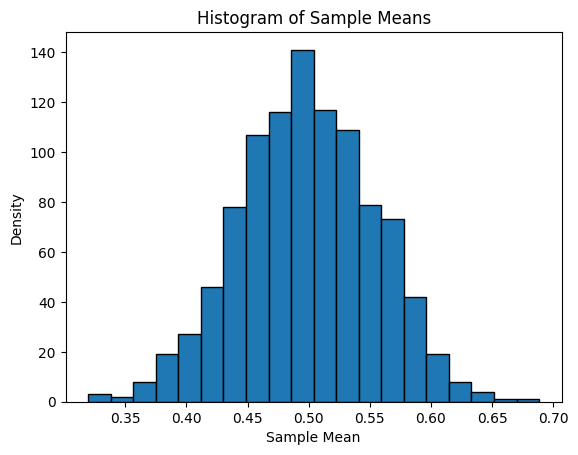

In [16]:
# set parameters
num_samples = 1000
size_smaples = 30
distribution = (0,1)

samples = np.random.uniform(distribution[0], distribution[1],(num_samples,size_smaples))
sample_means = np.mean(samples ,axis = 1)

plt.hist(sample_means,bins = 20,edgecolor = "black")
plt.title("Histogram of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Density")

## Log - Normal Distribution

In [19]:
# set parameters
num_samples = 1000
sample_size = 30

# Log-Normal distribution parameters
mu = 0.5
sigma = 0.7

# Calculate the theoretical mean and variance
theoretical_mean = np.exp(mu + (sigma ** 2) / 2)
theoretical_variance = (np.exp(sigma ** 2) - 1) * np.exp(2 * mu + sigma ** 2)

# Generate samples from the Log-Normal distribution
samples = np.random.lognormal(mean=mu, sigma=sigma, size=(num_samples, sample_size))


# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Calculate the empirical mean and variance of the sample means
empirical_mean = np.mean(sample_means)
empirical_variance = np.var(sample_means)
# Compare the theoretical and empirical values
print(f"Theoretical mean: {theoretical_mean:.4f}")
print(f"Empirical mean: {empirical_mean:.4f}")
print(f"\n")
print(f"Theoretical variance: {theoretical_variance:.4f}")
print(f"Empirical variance: {empirical_variance:.4f}")


Theoretical mean: 2.1064
Empirical mean: 2.1069


Theoretical variance: 2.8056
Empirical variance: 0.0838
